<h1 align=center><font size = 5>JT's IBM Data Science Capstone Assignment:</font></h1>

<h1 align=center><font size = 5>Red and Blue Gerrymandering</font></h1>

<h3 align=center><font size = 3>Responding to (alleged) unfair Georgia redistricting  </font></h3>

<a><img align=center src = https://upload.wikimedia.org/wikipedia/commons/5/54/Flag_of_Georgia_%28U.S._state%29.svg width = 200> </a>


_(image courtesy of wikipedia)_

<h3 align=left><font size = 4>Introduction (Business Problem Summary):</font></h3>

Amongst the issues affecting election campaigning, Gerrymandering is one of the most vexing and arcane.  Given the contentious nature of this topic in Georgia (USA) and the close results of recent elections, it is important that political campaign management firms (as well as voters) understand alternatives to counter effects of this issue in order to better target candidate marketing strategies during the next Georgia election season. 

Gerrymandering is a practice intended to establish an unfair political advantage for a particular party or group by manipulating US congressional election district boundaries. "Districts" define geographical boundaries, with each district within a state being geographically contiguous and having about the same number of state voters.  The redistricting process is managed by committee (currently chaired by the Republican party) and is expected to happen following the 2020 US census.  The last redistricting in Georgia occurred in 2015 and had come under fire due to suspected gerrymandering to suppress minority votes (source "https://democraticredistricting.com/state/georgia/").  

This report explores the demographics for the districts and those of counties across the state, *ignoring district boundaries*, in order to better understand make-up and potential avenues for combatting gerrymandering effects.    **The target audience for this analysis are political campaign management firms who do business in Georgia.**  Such firms typically control campaign investment strategies, including types of adverts, locations to focus on, and delivery channels for candidate communication.  Such strategies are aimed at achieving the highest voter turnout for the candidate, **therefore, demographics analysis is vital to the success and reputation of the campaign management firm** (as well as the candidate).


_Caveats: this is exploratory analysis (in the loosest sense); results and observations are limited to datasets available to students and in the context of the IBM Data Science Professional course schedule.  Moreover, this report does not express a political preference.  At a time where complete and accurate information ("truth") is under stress, it is important that readers bear these points in mind re: this notebook and report._

_Also be aware, this analysis required quite a few disparate files, including US government tables, which were awkward to parse and so is somewhat longer than notebooks referenced in course samples._

<h3 align=left><font size = 3>Data Requirements:</font></h3>

Certain characteristics of the 14 "red" (Republican) and  "blue" (Democratic) districts will be reviewed:
- voter population size
- ethnicity (using 2015 survey estimates related by BallotPedia)
- education levels
- age ranges
- poverty levels in each district
- local amenities (venue categories) for each district

_('Gender' has been excluded as there would be much more to say than my course time permits.)_

The features will be sourced from following:

https://ballotpedia.org/Redistricting_in_Georgia - will provide congressional districts by number, current representative by full name, party affiliation, election victory margins, and district ethnic demographic estimates (BallotPedia referenced the United States Census Bureau, "American Fact Finder: 2015 1-year estimates," for ethnicity data).    _Note - the election results were ignored (too old) however the ethnicity estimates were used as I could not find any usable district-level ethnicity data in the time available._

https://en.wikipedia.org/wiki/2018_United_States_House_of_Representatives_elections_in_Georgia - will provide congressional district 2018 election results for Georgia.

https://www2.census.gov/programs-surveys/demo/tables/voting/table02c.xlsx - "Characteristics (Educational Attainment) of the Citizen Voting-Age Population for Congressional Districts: 2018" - will provide education attainment per district.

https://www2.census.gov/programs-surveys/demo/tables/voting/table02a.xlsx - "Characteristics (Age) of the Citizen Voting-Age Population for Congressional Districts: 2018" - will provide voter age per district.

https://www2.census.gov/programs-surveys/demo/tables/voting/table02b.xlsx - "Characteristics (Sex and Poverty) of the Citizen Voting-Age Population for Congressional Districts: 2018" - will provide number of people living in poverty for each district.

"./Documents/Coursera IBM Data Sci Spec/9. Applied Data Science Capstone/Coursera_Capstone/georgia_districts_addr" - manually created from the .gov websites of each congressional representative (as per BallotPedia Georgia Districts html table), using the first office address where representatives may have had multiple addresses.

https://developer.foursquare.com/docs/build-with-foursquare/categories - FourSquare will be used to select venue information for each district. Such data will further inform the philosophy and voting pattern potential for a given district.

https://www.census.gov/geographies/mapping-files/2018/geo/kml-cartographic-boundary-files.html ("cb_2018_13_sldu_500k") map of Georgia USA with county boundaries, converted to geojson using the open-source tool kml2geojson.

Below data sources are county-level detail that will be used in the experimental reclustering of counties based on demographics and not congressional district: 


_**(Important note - counties are NOT subsets of districts)**_

"./Documents/Coursera IBM Data Sci Spec/9. Applied Data Science Capstone/Coursera_Capstone/CAINC30_GA_1969_2018.csv" - manually extracted from CAINC30 zip file downloaded from the "US Dept of Commerce - BEA Regional Economics Data" (https://apps.bea.gov/iTable/iTable.cfm?reqid=70&step=1&isuri=1&acrdn=8#reqid=70&step=1&isuri=1&acrdn=8 ).  Will provide population and income by county ('LineCodes' 100 and 110).

http://sos.ga.gov/admin/files/Active_Voters_by_Race_Gender_and_Age_as_of_May_1_2020.xlsx - from Georgia Voter Registration Statistics goverment site - active voter numbers by race and gender.

"/Users/jtege/Documents/Coursera IBM Data Sci Spec/9. Applied Data Science Capstone/Coursera_Capstone/Georgia_Congressional_Distr.png" - for map overlay of Georgia state 2013, courtesy of National Atlas.gov. (_*Note: congressional districts have not changed dramatically since 2013 so this map can be used as an indicative reference)*_

<h3 align=left><font size = 3>Methodology:</font></h3>

In order to suggest meaningful focus areas for campaign advisors, several steps will be followed:

1. **Data sourcing for Districts** - Useful data sources on Georgia congressional districts will be identified with information that is as current as possible (see "Data" section above). The data will then be loaded into a common 'merged' table which can be easily charted and evaluated (with '.head()' checks to insure data preprocessing efficacy).  Note that data will mostly be sourced from public and government websites with the exception of:
    + district center-point addresses, which are more difficult to source and required a manually-derived table
    + amenities information for districts of interest; this will be provided via FourSquare apis.


2. **Data Visualisation and Analysis for Districts** - Data visualisations will be created that illustrate demographic breakdowns for the districts.  Highlights and anomalies will be noted, with a view to narrowing focus to a few districts with the most interesting characteristics.  Further elaboration data will be charted for the districts to understand types of amenities available in each. 


3. **Data Sourcing, Visualisation and Analysis for Counties** - Repeat the Data sourcing and visualisation steps above for Counties (smaller geographical representations) in Georgia to identify clusters of counties that might further inform better ways of targetting voters than reliance on gerrymandered district boundaries.


4. **Results/Discussion** - Consolidate observations from above steps, contrasting District information.  Assess results, unusual observations, and other process observations that may be useful.


5. **Conclusions** - The final recommendations for the campaign managers, advisors and consultants (and voters alike).


<h3 align=left><font size = 3>Step 1 - Data sourcing:</font></h3>

First, grab necessary libraries:

In [1]:
#get basic dataframe libraries
import pandas as pd
import numpy as np

#get libraries to help url gets (for Beautiful Soup, FourSquare, etc)
import json
import requests
from pandas.io.json import json_normalize

#get mapping & charting libraries
%matplotlib inline 
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

plt.style.use('ggplot')
mpl.style.use('ggplot') 
#import os #to do a pic on map overlay as couldnt get certain geojson
import folium
from folium import plugins
from folium.plugins import ImageOverlay
from folium.map import Layer
print (folium.__version__)

#import to control fig rendering space (helps with desktop and html)
from branca.element import Figure
from branca.element import MacroElement

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

!conda install -c conda-forge geocoder --yes
import geocoder 

from geopy.geocoders import Nominatim

from bs4 import BeautifulSoup

#to get rid of special characters from web pages, if necessary
import string
ValidChar = string.ascii_letters+string.punctuation

#I'm using my Macbook Anaconda Jupyter environment so need wget
import wget


0.5.0
Solving environment: done

# All requested packages already installed.



Create a dataframe of districts (of which there are 14 in the state of Georgia) and associated data from the sources listed in the Data section above.  

Seed the dataframe using one of the Ballotpedia tables (there are a few tables in the page; use the "Electoral Margins of Victory...") via BeautifulSoup:

In [2]:
url="https://en.wikipedia.org/wiki/2018_United_States_House_of_Representatives_elections_in_Georgia"
req = requests.get(url)
soup = BeautifulSoup(req.content,'lxml')


In [3]:
#grab the 14th table format in the webpage and convert to a dataframe
table = soup.find_all('table')[13]

table_list = pd.read_html(str(table))
df_districts=pd.DataFrame(table_list[0])

#df_districts.head()

Clean this dataframe up a bit:
- replace column labels, 
- drop "Top opponent"s, "Georgia" and "%",  
- convert VictoryMargin to float % and 
- convert VotesCast to int
- add text reflecting political party of district

In [4]:
df_districts.columns = ['District', 'Republican Votes', 'Republican%',
                        'Democratic Votes', 'Democratic%', 
                        'Other Votes','Other%', 'Total Votes', 
                        'Total%', 'Election summary'] 

todrop = ['Republican%', 'Democratic%', 'Other Votes', 
          'Other%', 'Total Votes', 'Total%']
df_districts.drop(todrop, axis=1, inplace=True)
df_districts.drop([14], axis=0, inplace=True)


In [5]:
district_cols = df_districts.columns

df_districts['District'].str.strip(ValidChar).astype(bool).any()
df_districts['Election summary'].str.strip(ValidChar).astype(bool).any()

df_districts['District'] = \
  df_districts['District'].str.replace("District ","")

df_districts['District'] = \
  df_districts['District'].astype(str).astype(int)

df_districts[district_cols[1:2]] = \
  df_districts[district_cols[1:2]].astype(str).astype(int)

#add column to describe voting result margin, Republican - Democrat
df_districts['Rep-Dem Margin'] = \
  df_districts['Republican Votes'] - df_districts['Democratic Votes']


In [6]:
df_districts['Party']=None

for i, margin in enumerate(df_districts['Rep-Dem Margin']):
    if margin >0:
        df_districts.iloc[i, df_districts.columns.get_loc('Party')] = \
          "Republican"
    elif margin <0:
        df_districts.iloc[i, df_districts.columns.get_loc('Party')] = \
          "Democratic"
    else:
        df_districts.iloc[i, df_districts.columns.get_loc('Party')] = \
          "Error"    
    
print('Shape: ', df_districts.shape)
df_districts.head(3)

Shape:  (14, 6)


,District,Republican Votes,Democratic Votes,Election summary,Rep-Dem Margin,Party
0,1,144741,105942,Republican Hold,38799,Republican
1,2,92472,136699,Democratic Hold,-44227,Democratic
2,3,191996,101010,Republican Hold,90986,Republican


Add the voting data by ethnicity, following the same process as done for the dataframe seeding above:

In [7]:
#grab the 11th table format in the BallotPedia webpage and convert 
#to a dataframe
url2="https://ballotpedia.org/Redistricting_in_Georgia"

req = requests.get(url2)
soup = BeautifulSoup(req.content,'lxml')
table = soup.find_all('table')[10]

table_list = pd.read_html(str(table))
df_demogs = pd.DataFrame(table_list[0])

#df_demogs.head(3)


...and as with previous load, clean this table:

In [8]:
#remove header from column labels by renaming columns
demog_columns = ['Distr', 'Hispanic or Latino of any race', \
                    'White', 'Black or African American', \
                    'American Indian and Alaska Native', 'Asian', \
                    'Native Hawaiian and other Pacific Islander', \
                    'Other', 'Multiple races', 'todrop0']
df_demogs.columns = demog_columns


In [9]:
#get rid of superfluous or special characters
df_demogs['Distr'].str.strip(ValidChar).astype(bool).any()

df_demogs['Distr'] = \
  df_demogs['Distr'].str.replace(", Georgia","")
df_demogs['Distr'] = \
  df_demogs['Distr'].str.replace("District","")

#get rid of superfluous row and column
df_demogs.drop([14], axis=0, inplace=True)
df_demogs.drop(['todrop0'], axis=1, inplace=True)


In [10]:
#convert values to int (for later)
demog_columns = df_demogs.columns

df_demogs[demog_columns[1:]] = \
  df_demogs[demog_columns[1:]].astype(str).astype(int)

df_demogs['Distr'] = df_demogs['Distr'].astype(str).astype(int)

df_demogs.head(3)


,Distr,Hispanic or Latino of any race,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and other Pacific Islander,Other,Multiple races
0,1,44890,430591,210221,3215,14610,749,1614,18458
1,2,35412,272671,356532,1280,6816,672,541,9964
2,3,38910,481530,173346,969,11638,53,1830,14983


Merge the demographics df into the main df (df_districts_merged):

In [11]:
df_districts_merged = pd.merge(left=df_districts, right=df_demogs, 
                        left_on='District', right_on='Distr')

df_districts_merged.drop(['Distr'], axis=1, inplace=True)

print('shape: ', df_districts_merged.shape)
df_districts_merged.head(3)


shape:  (14, 14)


,District,Republican Votes,Democratic Votes,Election summary,Rep-Dem Margin,Party,Hispanic or Latino of any race,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and other Pacific Islander,Other,Multiple races
0,1,144741,105942,Republican Hold,38799,Republican,44890,430591,210221,3215,14610,749,1614,18458
1,2,92472,136699,Democratic Hold,-44227,Democratic,35412,272671,356532,1280,6816,672,541,9964
2,3,191996,101010,Republican Hold,90986,Republican,38910,481530,173346,969,11638,53,1830,14983


Add the district data on education, age, and poverty for districts in Georgia ("GA") in the cells below, cleansing as appropriate:

In [12]:
#pull education data
url_ed = \
 "https://www2.census.gov/programs-surveys/demo/tables/voting/table02c.xlsx"

df_education = pd.read_excel(url_ed, skiprows=range(3))

column_names = df_education.columns.values
column_names[1] = "State"
column_names[3] = "Districttodrop"
df_education.columns = column_names


In [13]:
tmp_df = df_education[['State', 'Districttodrop','Less than 9th grade', \
                     'High school or more', \
                      "Bachelor's degree or more"]]

df_ed = tmp_df[tmp_df['State'] == "GA"]


In [14]:
df_districts_merged = pd.merge(left=df_districts_merged, right=df_ed, 
                        left_on='District', right_on='Districttodrop')

df_districts_merged.drop(['Districttodrop', 'State'], axis=1, inplace=True)

print('shape: ', df_districts_merged.shape)
df_districts_merged.head(3)

shape:  (14, 17)


,District,Republican Votes,Democratic Votes,Election summary,Rep-Dem Margin,Party,Hispanic or Latino of any race,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and other Pacific Islander,Other,Multiple races,Less than 9th grade,High school or more,Bachelor's degree or more
0,1,144741,105942,Republican Hold,38799,Republican,44890,430591,210221,3215,14610,749,1614,18458,13076,486450,128664
1,2,92472,136699,Democratic Hold,-44227,Democratic,35412,272671,356532,1280,6816,672,541,9964,20248,411684,78128
2,3,191996,101010,Republican Hold,90986,Republican,38910,481530,173346,969,11638,53,1830,14983,12870,482821,135754


In [15]:
#pull age data
url_age = \
  "https://www2.census.gov/programs-surveys/demo/tables/voting/table02a.xlsx"

df_age = pd.read_excel(url_age, skiprows=range(3))
#df_age.head()

In [16]:
cols = df_age.columns.values

cols[1] = "State"
cols[3] = "Districttodrop"
cols[4] = "Voting Pop"
df_age.columns = cols


In [17]:
tmp_df = df_age[['State', 'Districttodrop', 'Voting Pop', \
                '18-29 years old', '30-44 years old',
                '45-64 years old', \
                '65 years old and older']]

df_age = tmp_df[tmp_df['State'] == "GA"]


In [18]:
df_districts_merged = pd.merge(left=df_districts_merged, right=df_age, 
                        left_on='District', right_on='Districttodrop')

df_districts_merged.drop(['Districttodrop', 'State'], axis=1, inplace=True)

print('shape: ', df_districts_merged.shape)
df_districts_merged.head(3)

shape:  (14, 22)


,District,Republican Votes,Democratic Votes,Election summary,Rep-Dem Margin,Party,Hispanic or Latino of any race,White,Black or African American,American Indian and Alaska Native,...,Other,Multiple races,Less than 9th grade,High school or more,Bachelor's degree or more,Voting Pop,18-29 years old,30-44 years old,45-64 years old,65 years old and older
0,1,144741,105942,Republican Hold,38799,Republican,44890,430591,210221,3215,...,1614,18458,13076,486450,128664,550713,124272,144285,173960,108196
1,2,92472,136699,Democratic Hold,-44227,Democratic,35412,272671,356532,1280,...,541,9964,20248,411684,78128,498322,116812,118050,158501,104959
2,3,191996,101010,Republican Hold,90986,Republican,38910,481530,173346,969,...,1830,14983,12870,482821,135754,548941,116928,126353,192813,112847


In [19]:
#pull poverty data
url_poverty = \
"https://www2.census.gov/programs-surveys/demo/tables/voting/table02b.xlsx"

df_poverty = pd.read_excel(url_poverty, skiprows=range(3))


In [20]:
cols = df_poverty.columns.values

cols[1] = "State"
cols[3] = "Districttodrop"
df_poverty.columns = cols


In [21]:
tmp_df = df_poverty[['State', 'Districttodrop','Below poverty level']]

df_poverty = tmp_df[tmp_df['State'] == "GA"]


In [22]:
df_districts_merged = pd.merge(left=df_districts_merged, 
                               right=df_poverty, 
                        left_on='District', right_on='Districttodrop')

df_districts_merged.drop(['Districttodrop', 'State'], axis=1, 
                         inplace=True)

print('shape: ', df_districts_merged.shape)
df_districts_merged.head(3)

shape:  (14, 23)


,District,Republican Votes,Democratic Votes,Election summary,Rep-Dem Margin,Party,Hispanic or Latino of any race,White,Black or African American,American Indian and Alaska Native,...,Multiple races,Less than 9th grade,High school or more,Bachelor's degree or more,Voting Pop,18-29 years old,30-44 years old,45-64 years old,65 years old and older,Below poverty level
0,1,144741,105942,Republican Hold,38799,Republican,44890,430591,210221,3215,...,18458,13076,486450,128664,550713,124272,144285,173960,108196,70331
1,2,92472,136699,Democratic Hold,-44227,Democratic,35412,272671,356532,1280,...,9964,20248,411684,78128,498322,116812,118050,158501,104959,98551
2,3,191996,101010,Republican Hold,90986,Republican,38910,481530,173346,969,...,14983,12870,482821,135754,548941,116928,126353,192813,112847,65079


In [23]:
#Divide numbers by 1000 and create merged label for plotting charts 
#later on
cols = df_districts_merged.columns.values

df_districts_merged[cols[6:]] = df_districts_merged[cols[6:]]/1000

df_districts_merged['District - Party'] = \
    df_districts_merged['District'].astype(str) + ' - ' + \
    df_districts_merged['Party']

print('shape: ', df_districts_merged.shape)
df_districts_merged.head(3)

shape:  (14, 24)


,District,Republican Votes,Democratic Votes,Election summary,Rep-Dem Margin,Party,Hispanic or Latino of any race,White,Black or African American,American Indian and Alaska Native,...,Less than 9th grade,High school or more,Bachelor's degree or more,Voting Pop,18-29 years old,30-44 years old,45-64 years old,65 years old and older,Below poverty level,District - Party
0,1,144741,105942,Republican Hold,38799,Republican,44.890,430.591,210.221,3.215,...,13.076,486.45,128.664,550.713,124.272,144.285,173.96,108.196,70.331,1 - Republican
1,2,92472,136699,Democratic Hold,-44227,Democratic,35.412,272.671,356.532,1.280,...,20.248,411.684,78.128,498.322,116.812,118.05,158.501,104.959,98.551,2 - Democratic
2,3,191996,101010,Republican Hold,90986,Republican,38.910,481.530,173.346,0.969,...,12.87,482.821,135.754,548.941,116.928,126.353,192.813,112.847,65.079,3 - Republican


Add geolocations for each district (using geocoder) for later mapping and venues per district contrasting.  As there is no convenient source for district centerpoint addresses, district address information was sourced from individual congressional representative websites (one address per district, using first address in "Office Location" pages)

In [24]:
csv_path="/Users/jtege/Documents/Coursera IBM Data Sci Spec/9. Applied Data Science Capstone/Coursera_Capstone/georgia_distr_addr.csv"
temp_df=pd.read_csv(csv_path)


In [25]:
df = temp_df
cols = df.columns.values
cols[0] = "Distr"
cols[1] = "rep"
df.columns = cols
df['Latitude']=None
df['Longitude']=None


In [26]:
#Load the longitudes and latitudes for the various district offices

for i, office in enumerate(df['DistrictOffice']):
    g = geocoder.arcgis(office)
    df.iloc[i, df.columns.get_loc('Latitude')] = g.latlng[0]
    df.iloc[i, df.columns.get_loc('Longitude')] = g.latlng[1]

df.head(3)

,Distr,rep,DistrictOffice,DistrictOfficeAddr,Latitude,Longitude
0,1,Earl Carter,Brunswick GA 31520,777 Gloucester Street Suite 410 Brunswick GA 3...,31.1478,-81.4889
1,2,Sanford Bishop Jr.,Albany GA 31701,323 Pine Avenue Suite 400 Albany GA 31701,31.564,-84.1662
2,3,Drew Ferguson,Newnan GA 30265,1601 E Hwy 34 Suite B Newnan GA 30265,33.3749,-84.7144


In [27]:
df_districts_merged = \
  pd.merge(left=df_districts_merged, right=df, 
                        left_on='District', right_on='Distr')

df_districts_merged.drop(['Distr', 'rep', 'DistrictOfficeAddr'], 
                         axis=1, inplace=True)

print('shape: ', df_districts_merged.shape)
df_districts_merged.head(3)

shape:  (14, 27)


,District,Republican Votes,Democratic Votes,Election summary,Rep-Dem Margin,Party,Hispanic or Latino of any race,White,Black or African American,American Indian and Alaska Native,...,Voting Pop,18-29 years old,30-44 years old,45-64 years old,65 years old and older,Below poverty level,District - Party,DistrictOffice,Latitude,Longitude
0,1,144741,105942,Republican Hold,38799,Republican,44.890,430.591,210.221,3.215,...,550.713,124.272,144.285,173.96,108.196,70.331,1 - Republican,Brunswick GA 31520,31.1478,-81.4889
1,2,92472,136699,Democratic Hold,-44227,Democratic,35.412,272.671,356.532,1.280,...,498.322,116.812,118.05,158.501,104.959,98.551,2 - Democratic,Albany GA 31701,31.564,-84.1662
2,3,191996,101010,Republican Hold,90986,Republican,38.910,481.530,173.346,0.969,...,548.941,116.928,126.353,192.813,112.847,65.079,3 - Republican,Newnan GA 30265,33.3749,-84.7144


In [28]:
#set associated party colors (handy for visualisations later) 

df_districts_merged['party_color']=""

df_districts_merged.loc[(df_districts_merged['Party'] == 
            "Republican"), 'party_color'] = "indianred"

df_districts_merged.loc[(df_districts_merged['Party'] == 
            "Democratic"), 'party_color'] = "cornflowerblue"

In [29]:
df_districts_merged.head(3)

,District,Republican Votes,Democratic Votes,Election summary,Rep-Dem Margin,Party,Hispanic or Latino of any race,White,Black or African American,American Indian and Alaska Native,...,18-29 years old,30-44 years old,45-64 years old,65 years old and older,Below poverty level,District - Party,DistrictOffice,Latitude,Longitude,party_color
0,1,144741,105942,Republican Hold,38799,Republican,44.890,430.591,210.221,3.215,...,124.272,144.285,173.96,108.196,70.331,1 - Republican,Brunswick GA 31520,31.1478,-81.4889,indianred
1,2,92472,136699,Democratic Hold,-44227,Democratic,35.412,272.671,356.532,1.280,...,116.812,118.05,158.501,104.959,98.551,2 - Democratic,Albany GA 31701,31.564,-84.1662,cornflowerblue
2,3,191996,101010,Republican Hold,90986,Republican,38.910,481.530,173.346,0.969,...,116.928,126.353,192.813,112.847,65.079,3 - Republican,Newnan GA 30265,33.3749,-84.7144,indianred


***********************************************************************

<h3 align=left><font size = 3>Step 2 - Data visualisation and Analysis:</font></h3>

***Chart observations to evaluate districts that may be of most interest to campaign advisors and consultants.***


In [30]:
#show ethnicity across districts.  Consolidate smaller columns
#into the 'Other' category strictly for bar chart formatting (not
#because the numbers aren't important)
cols=['District', 'District - Party', 
      'Hispanic or Latino of any race', 
     'White', 'Black or African American',
      'American Indian and Alaska Native',
     'Asian', 'Native Hawaiian and other Pacific Islander',
     'Other', 'Multiple races']

#df_ethnicity = pd.DataFrame(columns=cols)
df_ethnicity = pd.DataFrame(data=None)
df_ethnicity[cols] = df_districts_merged[cols]

df_ethnicity['Other'] = df_ethnicity['Other'] + \
    df_ethnicity['American Indian and Alaska Native'] + \
    df_ethnicity['Native Hawaiian and other Pacific Islander'] + \
    df_ethnicity['Multiple races']

df_ethnicity.drop(['American Indian and Alaska Native',
                  'Native Hawaiian and other Pacific Islander',
                  'Multiple races'], axis=1, inplace=True)

#and add % for later df display
cols = df_ethnicity.columns.values
ethnicity_tot = df_ethnicity[cols[1:]].sum(axis=1)

df_ethnicity['Hispanic/ Latino %'] = \
    ( (df_ethnicity['Hispanic or Latino of any race'] / \
     ethnicity_tot) * 100).round(2)
df_ethnicity['White %'] = ( (df_ethnicity['White'] / \
     ethnicity_tot) * 100).round(2)
df_ethnicity['Black/ African American %'] = \
    ( (df_ethnicity['Black or African American'] / \
     ethnicity_tot) * 100).round(2)
df_ethnicity['Asian %'] = ( (df_ethnicity['Asian'] / \
     ethnicity_tot) * 100).round(2)
df_ethnicity['Other %'] = ( (df_ethnicity['Other'] / \
     ethnicity_tot) * 100).round(2)


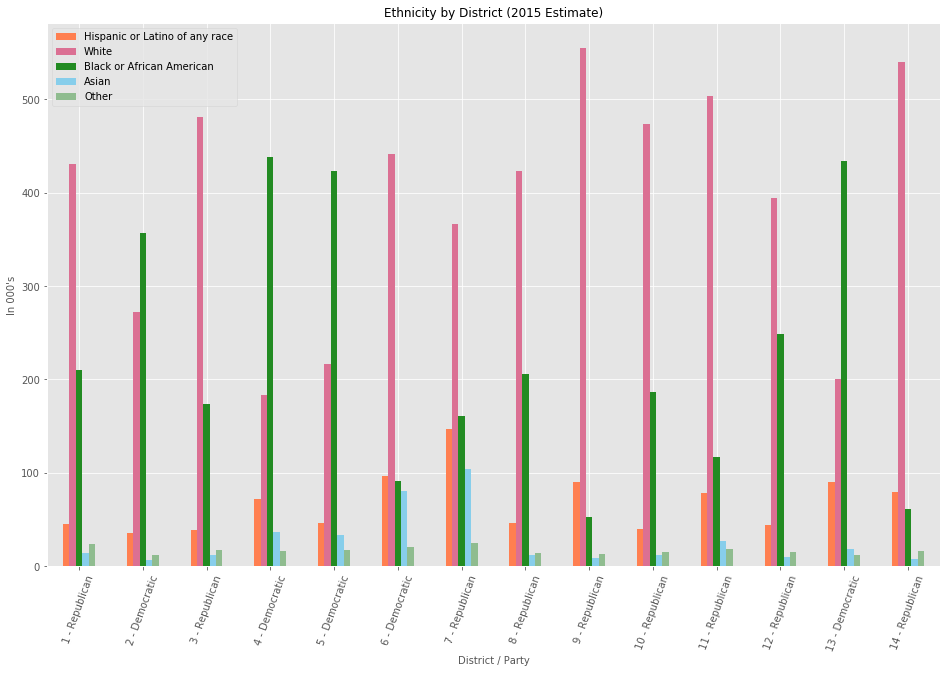

<Figure size 1152x720 with 0 Axes>

In [31]:
cols=['District - Party', 'Hispanic or Latino of any race', 
     'White', 'Black or African American',
     'Asian', 'Other']

colorlist=['coral', 'palevioletred', 
           'forestgreen', 'skyblue', 'darkseagreen'] 

labels = df_ethnicity['District - Party']

x=np.arange(0,600,100)
ax=df_ethnicity[cols].plot(kind='bar', 
                   figsize=(16,10), 
                   color=(colorlist))

ax.set_title("Ethnicity by District (2015 Estimate)",
             fontsize=12)

ax.set_yticks(x)

ax.set_xticklabels(labels, fontsize=10, rotation=70)


ax.set_xlabel("District / Party", fontsize=10)
ax.set_ylabel("In 000's", fontsize=10)

plt.legend(fontsize=10)

plt.figure(figsize=(16,10))

plt.show()

_Note that the district comparison tables are a little crowded so I have not added column totals to the bars (as done in later bar charts).  Also, I have opted to 'spotlight' interesting data using a "top 3s" df instead of more bar charts on the demographics; I think this makes the data presentation clearer._

In [32]:
df_intop3 = pd.DataFrame(data=None)

In [33]:
#top 3 districts by 'Hispanic or Latino of any race' voting 
#population size
df_display = \
  df_ethnicity[['District', 'District - Party', 
              'Hispanic/ Latino %']].sort_values(by =
                            ('Hispanic/ Latino %'), \
                         ascending=False).head(3)
#seed the top3 table
df_intop3 = df_display

In [34]:
#show top 3 districts by 'White' voting population size
df_display = df_ethnicity[['District', 'District - Party',
                           'White %']].sort_values(by = 
                            ('White %'), ascending=False).head(3)

df_intop3 = pd.concat([df_intop3, df_display])

In [35]:
#show top 3 districts by 'Black or African American' voting population 
#size
df_display = df_ethnicity[['District', 'District - Party',
#              'Black or African American', 
             'Black/ African American %']].sort_values(by = 
                         ('Black/ African American %'), \
                         ascending=False).head(3)

df_intop3 = pd.concat([df_intop3, df_display])

In [36]:
#show top 3 districts by 'Asian' and 'Other' voting population sizes
df_display = df_ethnicity[['District', 'District - Party', 
                           'Asian %', 
                          'Other %']].sort_values(by = 
                         (['Asian %', 'Other %']), \
                         ascending=False).head(3)

df_intop3 = df_intop3 = pd.concat([df_intop3, df_display])

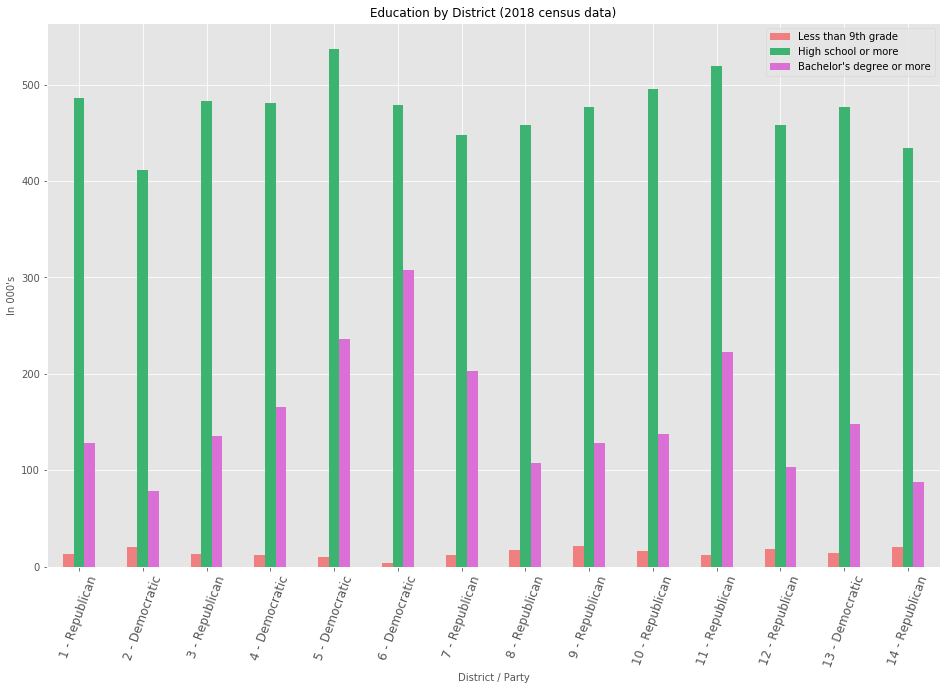

<Figure size 1152x720 with 0 Axes>

In [37]:
#show education across districts
cols=['District - Party', 'Less than 9th grade', 
      'High school or more',
       "Bachelor's degree or more"]

colorlist=['lightcoral', 'mediumseagreen', 'orchid']

labels = df_districts_merged['District - Party']

x=np.arange(0,600,100)
ax=df_districts_merged[cols].plot(kind='bar', 
                   figsize=(16,10), 
                   color=(colorlist))

ax.set_title("Education by District (2018 census data)",
             fontsize=12)

ax.set_yticks(x)

ax.set_xticklabels(labels, fontsize=12, rotation=70)


ax.set_xlabel("District / Party", fontsize=10)
ax.set_ylabel("In 000's", fontsize=10)

plt.legend(fontsize=10)

plt.figure(figsize=(16,10))

plt.show()

In [38]:
#show top 3 districts with highest education attainment
df_display = pd.DataFrame(data=None)
df_display = df_districts_merged[['District', 'District - Party', \
                        "Bachelor's degree or more"]].sort_values(by=
                    "Bachelor's degree or more", 
                                      ascending = False).head(3)

df_intop3 = pd.concat([df_intop3, df_display])

In [39]:
#show the 3 districts with least education (highest below 9th grade)
df_display = pd.DataFrame(data=None)
df_display = df_districts_merged[['District', 'District - Party', \
                        'Less than 9th grade']].sort_values(by = 
                    'Less than 9th grade', 
                                      ascending = False).head(3)

df_intop3 = pd.concat([df_intop3, df_display])

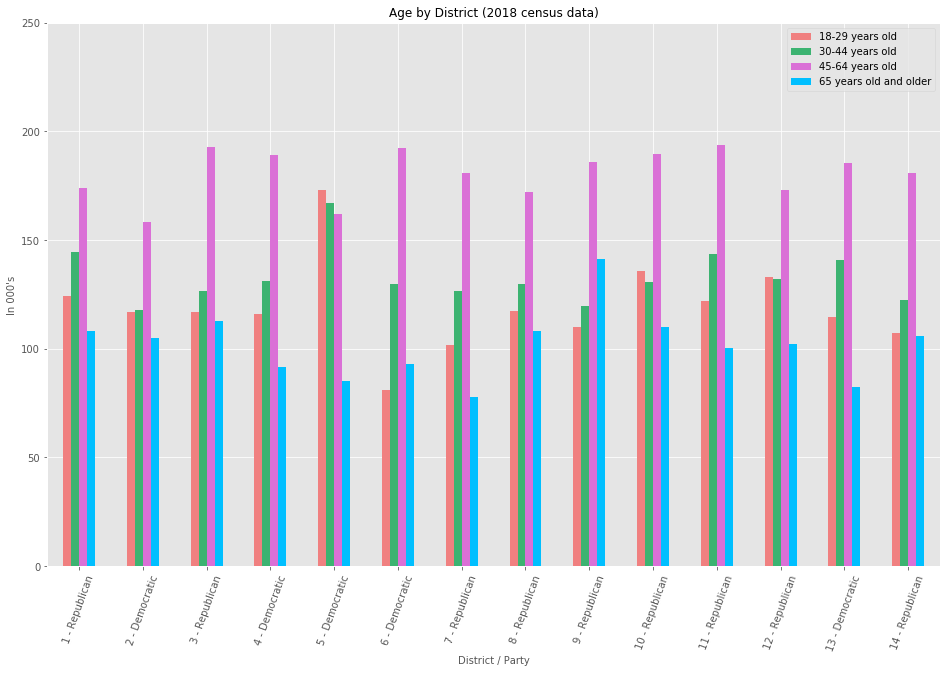

<Figure size 1152x720 with 0 Axes>

In [40]:
#show voting age demographics across districts
cols=['District - Party', '18-29 years old', '30-44 years old', 
       '45-64 years old', '65 years old and older']

colorlist=['lightcoral', 'mediumseagreen', 'orchid', 'deepskyblue']

labels = df_districts_merged['District - Party'] 

x=np.arange(0,300,50)
ax=df_districts_merged[cols].plot(kind='bar', 
                   figsize=(16,10), 
                   color=(colorlist))

ax.set_title("Age by District (2018 census data)",
             fontsize=12)

ax.set_yticks(x)

ax.set_xticklabels(labels, fontsize=10, rotation=70)


ax.set_xlabel("District / Party", fontsize=10)
ax.set_ylabel("In 000's", fontsize=10)

plt.legend(fontsize=10)

plt.figure(figsize=(16,10))

plt.show()


In [41]:
#add the relative voting by age
df_rel_voting = pd.DataFrame(data=None) 

df_rel_voting['District'] = df_districts_merged['District']

df_rel_voting['District - Party'] = \
    df_districts_merged['District - Party']

df_rel_voting['18-29 years old %'] = \
    ((df_districts_merged['18-29 years old'] / \
      df_districts_merged['Voting Pop']) * 100).astype(float).round(2)

df_rel_voting['30-44 years old %'] = \
    ((df_districts_merged['30-44 years old'] / \
      df_districts_merged['Voting Pop']) * 100).astype(float).round(2)

df_rel_voting['45-64 years old %'] = \
    ((df_districts_merged['45-64 years old'] / \
      df_districts_merged['Voting Pop']) * 100).astype(float).round(2)

df_rel_voting['65 years old and older %'] = \
    ((df_districts_merged['65 years old and older'] / \
      df_districts_merged['Voting Pop']) * 100).astype(float).round(2)

df_rel_voting['Total Voting-Aged Pop (000s)'] = \
    df_districts_merged['Voting Pop']


In [42]:
#show top 3 districts for 18-29 year old voting population %
df_display = df_rel_voting[['District', 'District - Party',
                            '18-29 years old %']].sort_values(by=
                    ('18-29 years old %'), ascending=False).head(3)

df_intop3 = pd.concat([df_intop3, df_display])

In [43]:
#show top 3 districts for 30-44 year old voting population %
df_display = df_rel_voting[['District', 'District - Party',
                            '30-44 years old %']].sort_values(by=
                    ('30-44 years old %'), ascending=False).head(3)

df_intop3 = pd.concat([df_intop3, df_display])

In [44]:
#show top 3 districts for 45-64 year old voting population %
df_display = df_rel_voting[['District', 'District - Party',
                            '45-64 years old %']].sort_values(by=
                    ('45-64 years old %'), ascending=False).head(3)

df_intop3 = pd.concat([df_intop3, df_display])

In [45]:
#show top 3 districts for 45-64 year old voting population %
df_display = df_rel_voting[['District', 'District - Party',
                        '65 years old and older %']].sort_values(by=
                ('65 years old and older %'), ascending=False).head(3)

df_intop3 = pd.concat([df_intop3, df_display])

In [46]:
#now show all demographic top3 data

df_intop3 = df_intop3.sort_values(by=('District'),
                                 ascending=True)
df_display = df_intop3.groupby(df_intop3['District'], 
                               as_index=False).max()

df_display.drop('District', axis=1, inplace=True)
df_display.replace(np.nan, '-', inplace=True)
df_display.style.hide_index()

District - Party,Hispanic/ Latino %,White %,Black/ African American %,Asian %,Other %,Bachelor's degree or more,Less than 9th grade,18-29 years old %,30-44 years old %,45-64 years old %,65 years old and older %
1 - Republican,-,-,-,-,-,-,-,-,26.200000,-,-
2 - Democratic,-,-,-,-,-,-,20.248000,-,-,-,21.060000
3 - Republican,-,-,-,-,-,-,-,-,-,-,20.560000
4 - Democratic,-,-,58.660000,4.840000,2.240000,-,-,-,-,35.790000,-
5 - Democratic,-,-,57.510000,-,-,236.287000,-,29.450000,28.470000,-,-
6 - Democratic,13.180000,-,-,10.990000,2.830000,308.067000,-,-,-,38.780000,-
7 - Republican,18.300000,-,-,12.960000,3.100000,-,-,-,-,37.150000,-
9 - Republican,12.540000,77.040000,-,-,-,-,20.915000,-,-,-,25.390000
10 - Republican,-,-,-,-,-,-,-,24.020000,-,-,-
11 - Republican,-,67.620000,-,-,-,222.558000,-,-,-,-,-


Ethnicity data shows that, broadly speaking, the top 3 districts with a higher number of white constituents relative to the rest of the district population (Districts 9, 14 and 11 with 77.0%, 76.7%, and 67.6% white constituent voters, respectively) appear to have elected Republican candidates.  The top 3 districts with a higher number of black constituents (Districts 4, 13 and 5 with 58.7%, 57.5% and 57.5%, respectively) appear to have elected Democratic candidates.  The exception is District 6, where the bar graph shows the proportion of white constituents to be higher relative to the rest of the district population but a Democratic candidate was elected.  

Education data shows that District 6 has the highest number of college graduates (308.1k), followed by District 5 (236.3k) and District 11 (222.6k).
District 9 has the highest number of people who did not enter highschool, followed by Districts 14 and 2 (20.9k, 20.7k, and 20.2k, respectively).  

Lastly, Age data shows District 5 to have the largest voting participation from 18-44 year old constituents whilst District 6 appears to have the greatest participation from 45-64 year old constituents, and District 9 has the greatest participation from constituents 65 years and older.  

Districts 1, 3, 10 and 12 appear in the ethnicity, education and age  top3 list the least and so appear to be unremarkable districts in terms of these areas.

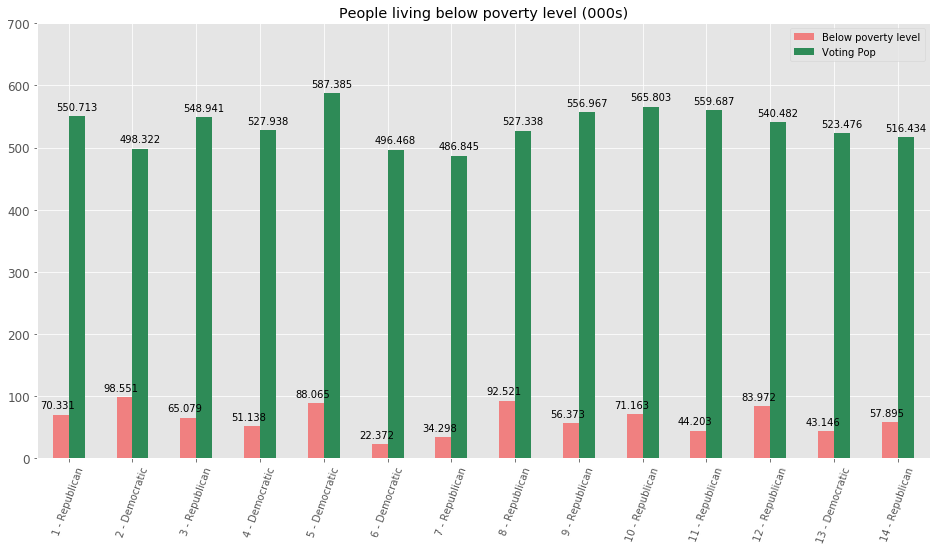

In [47]:
#show relative poverty across districts
cols=['District - Party', 'Below poverty level', 'Voting Pop']

colorlist=['lightcoral', 'seagreen']

labels = df_districts_merged['District - Party']

#plot poverty and population next to each other - whilst it is
#unclear that the poverty figures only include voters, it is useful
#nonetheless to understand the voting size relative to poverty size 
#in each district <-PROMOTE THIS COMMENT******************

#plot a bar chart for each cluster's stat result
ytcks1=np.arange(0,750,100)
ax1=df_districts_merged[cols].plot(kind='bar', 
    title='People living below poverty level (000s)',
    fontsize=12, rot=0, figsize=(16,8), color=colorlist)
#add totals at top of bar for better visualisation
for i in ax1.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax1.annotate('{:}'.format(height), (x - 0.2, y + height + 10.0), 
                 fontsize=10, 
                 color='black')
ax1.set_yticks(ytcks1)
ax1.set_xticklabels(labels, fontsize=10, rotation=70)


#plt.figure(figsize=(16,10))

plt.show()

Poverty data shows highest levels to be in Districts 2 (98.6k people) followed by Districts 8 (92.5k people), 5 (88.1k people), with District 12 in close proximity (at ~84k people).  Districts 2 and 5 are Democratic and Districts 8 and 12 are Republican, suggesting that poverty level is not necessarily a party vote differentiator.  

Note that District 6 appears to have the lowest level of poverty in Georgia at 22.4k people.  

In [48]:
#show the election victory margins for each district, to help focus
#analysis
df_display=pd.DataFrame(data=None)
df_display = df_districts_merged[['District - Party', 
                                  'Election summary', 
                                  'Republican Votes',
                                'Democratic Votes', 
                                  'Rep-Dem Margin']].copy()

df_display.style.hide_index()

District - Party,Election summary,Republican Votes,Democratic Votes,Rep-Dem Margin
1 - Republican,Republican Hold,144741,105942,38799
2 - Democratic,Democratic Hold,92472,136699,-44227
3 - Republican,Republican Hold,191996,101010,90986
4 - Democratic,Democratic Hold,61092,227717,-166625
5 - Democratic,Democratic Hold,0,275406,-275406
6 - Democratic,Democratic Gain,156875,160139,-3264
7 - Republican,Republican Hold,140430,140011,419
8 - Republican,Republican Hold,198152,0,198152
9 - Republican,Republican Hold,224661,57912,166749
10 - Republican,Republican Hold,190396,112339,78057


Based on data visualised and analysis thus far, interesting districts for campaign advisor priority review are:
- District 6 - unusual race demographic relative to political party elected, second-highest populations of Hispanic, Asia and Other ethnicity, highest educational attainment, highest number of voters aged between 45-64 years old, and lowest poverty level.  It is also the only district to have elected a different party in 2018, albeit by the second narrowest margin (3,264 votes).
- District 2 - highest poverty level, lowest educational attainment, second-highest percentage of older voters (65 and older).
- District 9 - highest population of white voters, lowest educational attainment, greatest percentage of older voters (65 and older) and largest election victory margin (166,749 votes - note unopposed elections in Districts 5 & 8 were ignored).

Now pull amenities data (using the FourSquare service) for all Georgia
congressional districts to see other potentially defining characteristics across districts.  Results will be formatted into a 'top venues' chart to illustrate district similarities/differences and potential ad campaign targets.

In [49]:
#create new df for the venue information
df_district_venuetypes = \
  df_districts_merged[['District', 'DistrictOffice', 'Party', 
                       'Voting Pop', 
                      'Latitude', 'Longitude']]

print('shape: ', df_district_venuetypes.shape)
df_district_venuetypes.head(3)

shape:  (14, 6)


,District,DistrictOffice,Party,Voting Pop,Latitude,Longitude
0,1,Brunswick GA 31520,Republican,550.713,31.1478,-81.4889
1,2,Albany GA 31701,Democratic,498.322,31.564,-84.1662
2,3,Newnan GA 30265,Republican,548.941,33.3749,-84.7144


In [50]:
#load credentials
filename1="/Users/jtege/Documents/Coursera IBM Data Sci Spec/9. Applied Data Science Capstone/fsq.clientid"
with open(filename1) as file1:
    CLIENT_ID=file1.read()

filename2="/Users/jtege/Documents/Coursera IBM Data Sci Spec/9. Applied Data Science Capstone/fsq.clientsec"
with open(filename2) as file2:
    CLIENT_SECRET=file2.read()
    
#and limit the FourSquare returned data to up to 1000 venues located 
#within 3200 meters (approx 2 miles) of each district's office.
RADIUS=3200
LIMIT=1000
VERSION = '20180605'

In [51]:
#convenient function to construct a venues df from a loop
def getNearbyVenues(district, names, party, population, 
                    latitudes, longitudes, radius=500):    
    venues_list=[]
    for distr, name, pty, pop, lat, lng in zip(district, names, 
                                               party, population, 
                                               latitudes, longitudes):
        print("district ", distr, " ", name)            
        url = \
        'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, 
            LIMIT)            
        results = \
            requests.get(url).json()["response"]['groups'][0]['items']   
        venues_list.append([(distr, name, pty, pop, lat, lng,  
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results] )

    nearby_venues = pd.DataFrame([item for venue_list in 
                                  venues_list for item in venue_list])
    nearby_venues.columns = ['District', 'Location', 'Party', 
                            'Voting Pop', 
                            'Location Latitude', 
                            'Location Longitude', 
                            'Venue', 
                            'Venue Latitude', 
                            'Venue Longitude', 
                            'Venue Category']
    
    return(nearby_venues)

In [52]:
#get district venues using function defined earlier (uses 
#FourSquare)
district_venues = \
  getNearbyVenues(district=df_district_venuetypes['District'],
                  names=df_district_venuetypes['DistrictOffice'],
                  party=df_district_venuetypes['Party'],
                  population=df_district_venuetypes['Voting Pop'],
                latitudes=df_district_venuetypes['Latitude'],
                longitudes=df_district_venuetypes['Longitude'],
                 radius=RADIUS)

district  1   Brunswick GA 31520
district  2   Albany GA 31701
district  3   Newnan GA 30265
district  4   Decatur GA 30035
district  5   Atlanta GA 30303
district  6   Atlanta GA 30328
district  7   Lawrenceville GA 30046-6935
district  8   Tifton GA 31794
district  9   Gainesville GA 30501
district  10   Monroe GA 30655
district  11   Woodstock GA 30188
district  12   Augusta GA 30909
district  13   Jonesboro GA 30236
district  14   Rome GA 30161


In [53]:
#set a reasonable limit for the number of district preferences to 
#review (this may seem somewhat arbitrary but we have to start 
#somewhere...also I found that a 'reasonable' number helps to make 
#initial data visualisations easier to read)
top_venues_lim = 5

In [54]:
#sort and get counts of venue categories by district/party
df_sort = pd.DataFrame(data=None)

df_sort = district_venues[['District', 
                           'Party', 
                           'Venue Category']].copy()

df_sort = df_sort.sort_values(by=(['District']),
                                ascending=True).reset_index()

df_sort = df_sort.groupby(['District', 'Party', 'Venue Category'],
                                  as_index=False).count()
df_sort = df_sort.sort_values(by=(['District', 'index']),
                             ascending=False)

df_sort = df_sort.reset_index()

districts = []
districts = df_sort['District'].unique()

df_tops = pd.DataFrame(data = None)

#quick and dirty loop to get the top 'n' venues data for each district
for distr in districts:
    df_temp0 = pd.DataFrame(data=None)
    df_temp0 = df_temp0.append(df_sort.loc[df_sort['District']==distr])
    df_temp1 = df_temp0.head(top_venues_lim)
    df_tops = df_tops.append(df_temp1)

df_tops=df_tops.rename({'index':'Venue Count'}, axis=1)

df_tops.head(3)

,level_0,District,Party,Venue Category,Venue Count
0,571,14,Republican,Hotel,4
1,553,14,Republican,BBQ Joint,2
2,554,14,Republican,Bakery,2


Plot the venue data in a stacked bar chart to illustrate preferences by district.

In [55]:
#set color range depending on how many venue categories are in the df
#(this technique was applied in the Course 9 kmeans lab).

unique_categories = len(df_tops['Venue Category'].unique())
x = np.arange(unique_categories)

ys = [i + x + (i*x)**2 for i in range(unique_categories)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

df_cats=pd.DataFrame(data=None)
df_cats['cat'] = df_tops['Venue Category'].unique()
df_cats = df_cats.sort_values(by=['cat'], 
                              ascending = True).reset_index()

#now add rainbow colours to the categories
df_cats['colour'] = rainbow

#df_cats.head(3)

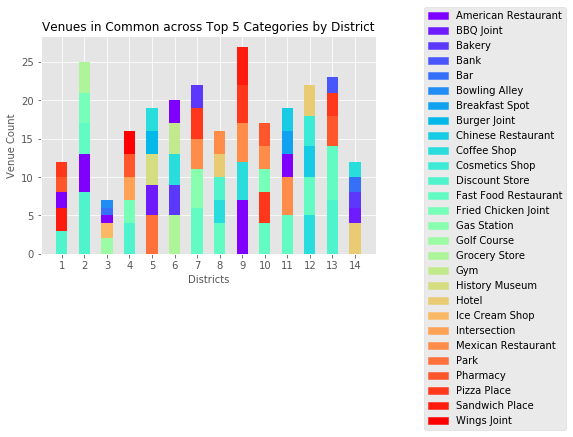

<Figure size 1152x720 with 0 Axes>

In [56]:
#set up bar chart object by looping through district venue data, 
#plotting each district's bar for that category using a colour from 
#the colour mapping we've just set up

#set these variables to help stack the bars properly, then loop
#to add each venue category total onto the district bar
prevbot=0
saved=""
for distr, category, count in zip(df_tops['District'], 
                                    df_tops['Venue Category'],
                                    df_tops['Venue Count']):
#    print ('i: ', i, ' ', distr, ' ', category, ' ', count)
    catcol = df_cats['colour'].loc[df_cats['cat']==category]
    if distr != saved:
        plt.bar(distr, count, width = 0.5, bottom = 0, color=catcol)
        prevbot = count
        saved = distr
    else:
        plt.bar(distr, count, width = 0.5, bottom = prevbot,
                color=catcol)
        prevbot = prevbot + count
    
plt.title(
    "Venues in Common across Top {} Categories by District".format(
        top_venues_lim),
             fontsize=12)

plt.xticks(df_tops['District'].unique(), 
                    fontsize=10)

plt.xlabel("Districts", fontsize=10)
plt.ylabel("Venue Count", fontsize=10)


#due to the stacking, the legend had many duplicates; to fix this, I 
#had to reset the legend handles and colour.  
#Also had to shift the legend outside the plot area (via 'bbox_') as 
#it is quite long despite getting rid of duplicates
plt.legend(df_cats['cat'], fontsize=10, bbox_to_anchor=(1, 1), 
           bbox_transform=plt.gcf().transFigure)

legnd=plt.gca().get_legend()

for i in range(unique_categories):
    legnd.legendHandles[i].set_color(df_cats['colour'][i])

plt.figure(figsize=(16,10))

plt.show()

This chart reflects numbers of venues of the top venue types per district, as returned from FourSquare (limited to 1000 entries per district within 3200 meters, approx. 2 miles, of the district head office).  The data suggests that there are certain venue preferences in common across a number of districts, for example, Fast Food restaurants, American restaurants and Sandwich places).  These venues may be of use during capaign advertisement placement selection. although the limited select size and FourSquare categorisation limitations suggests this chart should not necessarily be used to drive a strategy discussion.

***********************************************************************

<h3 align=left><font size = 3>Step 3 - Iterate: repeat Data Sourcing,  Visualisation and Analysis for Counties:</font></h3>

***Gather data by county that could inform other means of grouping voters than the currently-gerrymandered district borders.  This 'new' view of voters can help direct the focus of campaign advisors and consultants.***

Obtain county information on voter population size, age ranges and income levels in each county to use as features in clustering later _(note: unfortunately I could not source equivalent information on 'education')._

In [57]:
#pull per-capita personal income (line 110), 
#except 'GeoName' = "Georgia"
csv_path="/Users/jtege/Documents/Coursera IBM Data Sci Spec/9. Applied Data Science Capstone/Coursera_Capstone/CAINC30_GA_1969_2018.csv"
df_temp=pd.read_csv(csv_path)

df_temp = df_temp.loc[ (
    (df_temp['GeoName'] != "Georgia") & (df_temp['LineCode'] == 110) ) ]


In [58]:
#prep counties income data
df_counties_merged = pd.DataFrame(data=None)

df_counties_merged = df_temp[['GeoName', '2018']].copy()

cols=['County', '2018 Per Capita Income (000s)'] 

df_counties_merged.columns = cols

df_counties_merged['2018 Per Capita Income (000s)'] = \
  (df_counties_merged['2018 Per Capita Income (000s)'] / 1000).round(2)


#make County upper case for later merging with other upper case data
df_counties_merged['County'] = \
    df_counties_merged['County'].apply(lambda x: x.upper())

df_counties_merged.head(3)

,County,2018 Per Capita Income (000s)
39,"APPLING, GA",33.27
70,"ATKINSON, GA",30.51
101,"BACON, GA",33.08


In [59]:
#Load the longitudes and latitudes for the various counties
df_counties_merged['Latitude'] = None
df_counties_merged['Longitude'] = None

for i, county in enumerate(df_counties_merged['County']):
    g = geocoder.arcgis(county)
#    print('county: ', county)
    df_counties_merged.iloc[ 
      i, df_counties_merged.columns.get_loc('Latitude')] = g.latlng[0]
    df_counties_merged.iloc[
      i, df_counties_merged.columns.get_loc('Longitude')] = g.latlng[1]
    
#...and then drop the Georgia suffix from county names
df_counties_merged['County'] = \
    df_counties_merged['County'].str.replace(", GA","")

df_counties_merged.head(3)

,County,2018 Per Capita Income (000s),Latitude,Longitude
39,APPLING,33.27,33.5478,-82.3166
70,ATKINSON,30.51,31.2226,-81.8472
101,BACON,33.08,31.5537,-82.4527


In [60]:
#pull 2018 demographic data by county from constructed webpage 
#(courtesy of US Census Bureau)
url = \
    'http://sos.ga.gov/admin/files/Active_Voters_by_Race_Gender_and_Age_as_of_May_1_2020.xlsx'
outfile = '/Users/jtege/Documents/Coursera IBM Data Sci Spec/9. Applied Data Science Capstone/Coursera_Capstone/Active_Voters_by_Race_Gender_and_Age_as_of_May_1_2020.xlsx'

wget.download(url, outfile)
df_county_demogs = pd.read_excel(outfile, skiprows=range(8))

#get rid of county totals rows (these have NaN in certain columns)
df_county_demogs=df_county_demogs.dropna(axis=0)


In [61]:
#keep slicing to minimum (for clarity) but shorten excel label names
cols=['COUNTY ID', 
      'COUNTY NAME', 
      'VOTER AGE RANGE',
      'AI MALE', 'AI FEM', 'AI UNK', 
      'AP MALE', 'AP FEM', 'AP UNK',
      'BH MALE', 'BH FEM', 'BH UNK', 
      'HP MALE', 'HP FEM', 'HP UNK',
      'WH MALE', 'WH FEM', 'WH UNK', 
      'OT MALE', 'OT FEM', 'OT UNK',
      'UK MALE', 'UK FEM', 'UK UNK',
        'TOTAL VOTERS']
df_county_demogs.columns = cols

df_county_demogs.head(3)

,COUNTY ID,COUNTY NAME,VOTER AGE RANGE,AI MALE,AI FEM,AI UNK,AP MALE,AP FEM,AP UNK,BH MALE,...,WH MALE,WH FEM,WH UNK,OT MALE,OT FEM,OT UNK,UK MALE,UK FEM,UK UNK,TOTAL VOTERS
0,001,APPLING,18-24,2,1,0,5,5,0,110,...,398,399,1,4,14,0,120,79,1,1317
1,001,APPLING,25-29,0,0,0,3,1,0,85,...,275,324,1,5,6,0,43,31,0,895
2,001,APPLING,30-34,0,0,0,2,3,0,68,...,257,286,0,2,3,0,31,26,0,778


In [62]:
#prep age data, incl pivoting to make age range columns instead of rows

df_age_temp = pd.DataFrame(data=None) 

df_age_temp = df_county_demogs[['COUNTY NAME',
                            'VOTER AGE RANGE',
                            'TOTAL VOTERS']]

#prep age data, incl pivoting to make age range columns instead of rows
df_age_temp = df_age_temp.pivot(index='COUNTY NAME', columns = 
    'VOTER AGE RANGE', 
     values = 'TOTAL VOTERS').reset_index().rename_axis(None, axis=1)

df_age_temp.head(3)
 

,COUNTY NAME,17 1/2,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65+
0,APPLING,NaN,1317.0,895.0,778.0,805.0,836.0,884.0,899.0,1043.0,1035.0,2744.0
1,ATKINSON,NaN,658.0,427.0,365.0,347.0,324.0,333.0,404.0,387.0,381.0,999.0
2,BACON,NaN,725.0,480.0,502.0,456.0,596.0,568.0,529.0,509.0,536.0,1557.0


In [63]:
#consolidate age ranges - follow the pattern used for the district
#demographic analysis earlier, incl adding % for later use
#

df_age_temp['18-29 years old (000s)'] = (df_age_temp['18-24'] + \
                    df_age_temp['25-29']) / 1000
 
df_age_temp['30-44 years old (000s)'] = (df_age_temp['30-34'] + \
                    df_age_temp['35-39'] + df_age_temp['40-44']) / 1000

df_age_temp['45-64 years old (000s)'] = (df_age_temp['45-49'] + \
                    df_age_temp['50-54'] +\
                    df_age_temp['55-59'] + df_age_temp['60-64']) / 1000

df_age_temp['65 years old and older (000s)']=df_age_temp['65+'] / 1000


#drop unncesssary columns
df_age_temp.drop(['17 1/2', '18-24', '25-29',
                 '30-34', '35-39', '40-44',
                 '45-49', '50-54', '55-59',
                 '60-64', '65+'], axis=1, inplace=True)

df_age_temp.head(3)

,COUNTY NAME,18-29 years old (000s),30-44 years old (000s),45-64 years old (000s),65 years old and older (000s)
0,APPLING,2.212,2.419,3.861,2.744
1,ATKINSON,1.085,1.036,1.505,0.999
2,BACON,1.205,1.554,2.142,1.557


In [64]:
#prep ethnicity demographics incl column totals to use for clustering
#(will consolidate certain data and not use the more granular columns).

#below adds columns together to consolidate ethnicity detail, then
#drops the unnec columns
df_county_demogs['Hispanic (000s)'] = \
    (df_county_demogs['HP MALE'] + \
    df_county_demogs['HP FEM'] + \
    df_county_demogs['HP UNK']) / 1000

df_county_demogs['White (000s)'] = \
    (df_county_demogs['WH MALE'] + \
    df_county_demogs['WH FEM'] + \
    df_county_demogs['WH UNK']) / 1000

df_county_demogs['Black (000s)'] = \
    (df_county_demogs['BH MALE'] + \
    df_county_demogs['BH FEM'] + \
    df_county_demogs['BH UNK']) / 1000

df_county_demogs['Asian or Pacific Isl (000s)'] = \
    (df_county_demogs['AP MALE'] + \
    df_county_demogs['AP FEM'] + \
    df_county_demogs['AP UNK']) / 1000

df_county_demogs['Other Ethn (000s)'] = \
    (df_county_demogs['AI MALE'] + \
    df_county_demogs['AI FEM'] + \
    df_county_demogs['AI UNK'] + \
    df_county_demogs['OT MALE'] + \
    df_county_demogs['OT FEM'] + \
    df_county_demogs['OT UNK'] + \
    df_county_demogs['UK MALE'] + \
    df_county_demogs['UK FEM'] + \
    df_county_demogs['UK UNK']) / 1000

df_county_demogs.drop([
      'AI MALE', 'AI FEM', 'AI UNK', 
      'AP MALE', 'AP FEM', 'AP UNK',
      'BH MALE', 'BH FEM', 'BH UNK', 
      'HP MALE', 'HP FEM', 'HP UNK',
      'WH MALE', 'WH FEM', 'WH UNK', 
      'OT MALE', 'OT FEM', 'OT UNK',
      'UK MALE', 'UK FEM', 'UK UNK'
        ], axis=1, inplace=True)

#now group the demographics numbers by county
df_county_demogs = df_county_demogs.sort_values(by=
                        ['COUNTY ID'], ascending=True)
df_county_demogs = df_county_demogs.groupby(['COUNTY ID', 
                                            'COUNTY NAME'],
                                           as_index = False).sum()

df_county_demogs.head(3)

,COUNTY ID,COUNTY NAME,TOTAL VOTERS,Hispanic (000s),White (000s),Black (000s),Asian or Pacific Isl (000s),Other Ethn (000s)
0,001,APPLING,11236,0.214,8.101,1.998,0.051,0.872
1,002,ATKINSON,4625,0.335,3.120,0.884,0.004,0.282
2,003,BACON,6458,0.093,5.097,0.811,0.019,0.438


In [65]:
#make the TOTAL VOTERS column 000s and rename cols (for consistency)
df_county_demogs['TOTAL VOTERS'] = \
    df_county_demogs['TOTAL VOTERS'] /1000

df_county_demogs.rename({'TOTAL VOTERS':'Voting Pop (000s)',
                        'COUNTY ID':'County Id'}, axis=1,
                        inplace=True)


In [66]:
#merge ethnicity county demographics data
df_counties_merged = pd.merge(left=df_counties_merged, 
                              right=df_county_demogs, 
                        left_on='County', right_on='COUNTY NAME')

df_counties_merged.drop(['COUNTY NAME'], 
                        axis=1, inplace=True)

df_counties_merged.head(3)

,County,2018 Per Capita Income (000s),Latitude,Longitude,County Id,Voting Pop (000s),Hispanic (000s),White (000s),Black (000s),Asian or Pacific Isl (000s),Other Ethn (000s)
0,APPLING,33.27,33.5478,-82.3166,001,11.236,0.214,8.101,1.998,0.051,0.872
1,ATKINSON,30.51,31.2226,-81.8472,002,4.625,0.335,3.120,0.884,0.004,0.282
2,BACON,33.08,31.5537,-82.4527,003,6.458,0.093,5.097,0.811,0.019,0.438


In [67]:
#and merge age demographics data
df_counties_merged = pd.merge(left=df_counties_merged, 
                              right=df_age_temp, 
                        left_on='County', right_on='COUNTY NAME')

df_counties_merged.drop(['COUNTY NAME'], 
                        axis=1, inplace=True)

df_counties_merged.head(3)

,County,2018 Per Capita Income (000s),Latitude,Longitude,County Id,Voting Pop (000s),Hispanic (000s),White (000s),Black (000s),Asian or Pacific Isl (000s),Other Ethn (000s),18-29 years old (000s),30-44 years old (000s),45-64 years old (000s),65 years old and older (000s)
0,APPLING,33.27,33.5478,-82.3166,001,11.236,0.214,8.101,1.998,0.051,0.872,2.212,2.419,3.861,2.744
1,ATKINSON,30.51,31.2226,-81.8472,002,4.625,0.335,3.120,0.884,0.004,0.282,1.085,1.036,1.505,0.999
2,BACON,33.08,31.5537,-82.4527,003,6.458,0.093,5.097,0.811,0.019,0.438,1.205,1.554,2.142,1.557


In [68]:
#Lastly, add demographics percentages
df_counties_merged['Hispanic %'] = \
    ((df_counties_merged['Hispanic (000s)'] / \
      df_counties_merged['Voting Pop (000s)']) *100).round(2)
df_counties_merged['White %'] = \
    ((df_counties_merged['White (000s)'] / \
      df_counties_merged['Voting Pop (000s)']) *100).round(2)
df_counties_merged['Black %'] = \
    ((df_counties_merged['Black (000s)'] / \
      df_counties_merged['Voting Pop (000s)']) *100).round(2)
df_counties_merged['Asian or Pacific Isl %'] = \
    ((df_counties_merged['Asian or Pacific Isl (000s)'] / \
      df_counties_merged['Voting Pop (000s)']) *100).round(2)
df_counties_merged['Other Ethn %'] = \
    ((df_counties_merged['Other Ethn (000s)'] / \
      df_counties_merged['Voting Pop (000s)']) *100).round(2)

df_counties_merged['18-29 years old %'] = \
    ((df_counties_merged['18-29 years old (000s)'] / 
        df_counties_merged['Voting Pop (000s)']) *100).round(2)
df_counties_merged['30-44 years old %'] = \
    ((df_counties_merged['30-44 years old (000s)'] / \
      df_counties_merged['Voting Pop (000s)']) \
         *100).round(2)
df_counties_merged['45-64 years old %'] = \
    ((df_counties_merged['45-64 years old (000s)'] / \
      df_counties_merged['Voting Pop (000s)']) \
         *100).round(2)
df_counties_merged['65 years old and older %'] = \
    ((df_counties_merged['65 years old and older (000s)'] /  
      df_counties_merged['Voting Pop (000s)']) *100).round(2)

df_counties_merged.head(3)

,County,2018 Per Capita Income (000s),Latitude,Longitude,County Id,Voting Pop (000s),Hispanic (000s),White (000s),Black (000s),Asian or Pacific Isl (000s),...,65 years old and older (000s),Hispanic %,White %,Black %,Asian or Pacific Isl %,Other Ethn %,18-29 years old %,30-44 years old %,45-64 years old %,65 years old and older %
0,APPLING,33.27,33.5478,-82.3166,001,11.236,0.214,8.101,1.998,0.051,...,2.744,1.90,72.10,17.78,0.45,7.76,19.69,21.53,34.36,24.42
1,ATKINSON,30.51,31.2226,-81.8472,002,4.625,0.335,3.120,0.884,0.004,...,0.999,7.24,67.46,19.11,0.09,6.10,23.46,22.40,32.54,21.60
2,BACON,33.08,31.5537,-82.4527,003,6.458,0.093,5.097,0.811,0.019,...,1.557,1.44,78.93,12.56,0.29,6.78,18.66,24.06,33.17,24.11


***********************************************************************

Now see what clusters are available given the county demographic features gathered above; this could yield further campaign-targetting intelligence and inform debates on the practice of gerrymandering.

In [69]:
#select interesting columns to use for our kmeans clustering
kcols=['2018 Per Capita Income (000s)', 
       'Voting Pop (000s)', 'Hispanic %', 'White %', 'Black %', 
       'Asian or Pacific Isl %', 'Other Ethn %', '18-29 years old %', 
       '30-44 years old %', '45-64 years old %', 
       '65 years old and older %']

In [70]:
#we'll set up a separate copy of the merged county data (makes it 
#easier to manipulate dataframes without unintended data consequences!)
df_county_clusters = pd.DataFrame(data=None)
df_county_clusters = df_counties_merged[kcols].copy()

#we'll drop the categorical value
#df_county_clusters = df_county_clusters.drop('County', axis=1)

#...and we'll normalise the data (as we're using a mathematical model)
X=df_county_clusters.values[:,1:]
#this line is a precautionary move, in case I missed a NaN
X=np.nan_to_num(X)

#execute normaliser
df_county_clusters = StandardScaler().fit_transform(X)


In [71]:
#In order to use the best 'kclusters', we'll run the kmeans algo a 
#few times, plotting the average mean distance between each datapoint
#and its respective centroid...then we'll see which cluster produced
#the most dramatic difference and will use that (this will require
#computing the "Sum of Squared differences", referred to as 'SSE' in
#the IBM course)
SSE=[]

#we'll test 14 kmeans cluster numbers (somewhat randomly selected...I 
#just went with the number of existing districts)
krange = np.arange(1,14)


In [72]:
#execute for loop of kmeans algos, 
for knum in krange:
    ktest = KMeans(n_clusters=knum, \
                random_state=0).fit(df_county_clusters)
    SSE.append(ktest.inertia_)
    

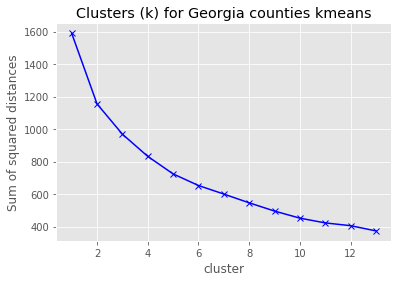

In [73]:
#now plot the average distance values and find the "elbow"
plt.plot(krange, SSE, 'bx-')
plt.xlabel('cluster')
plt.ylabel('Sum of squared distances')
plt.title('Clusters (k) for Georgia counties kmeans')
plt.show()

The test yielded an unsatisfactory result, in that the most dramatic
change in difference appears to be at 2, a very limited cluster 
number, and next most dramatic seems to be 10 and 12, which are too
many clusters for my purposes.  I will choose the next nearest change 
(as far as I am able to tell by visual inspection), which is 5.

In [74]:
#The test yielded an unsatisfactory result.  I will choose the next 
#nearest bend (as far as I am able to tell by visual inspection), 
#which is 5.

kclusters = 5

#...then add the cluster label into list of kcols columns of interest
kcols.append('Cluster')


In [75]:
#execute the kmeans clustering for real this time
kmeans = KMeans(n_clusters=kclusters, \
                random_state=0).fit(df_county_clusters)

klabels = kmeans.labels_


In [76]:
#we'll add column to reflect the cluster to which a county was
#assigned (from klabels, created after k-means executed)
df_counties_merged['Cluster'] = None

df_counties_merged['Cluster'] = klabels

#check the cluster labels
df_counties_merged['Cluster'].unique()

array([2, 0, 4, 3, 1], dtype=int32)

Now plot certain cluster statistics (county counts, population sizes, average income, ethnicity, age ranges) from each cluster to assess defining features.  

(Later, we will also plot these clusters on a Georgia map to aid our assessment).

In [77]:
#now get the count and voter population and income average in columns
df_cluster_stats = pd.DataFrame(data=None)

for i in range(0, kclusters):
    temp=[]

    temp=df_counties_merged[kcols].loc[
            df_counties_merged['Cluster']==i].groupby(
                df_counties_merged['Cluster']).count()
    
    temp['Total Voters (000s)']= \
        df_counties_merged['Voting Pop (000s)'].loc[
            df_counties_merged['Cluster']==i].groupby(
                df_counties_merged['Cluster']).sum()
    
    temp['2018 Per Capita Income (000s)']= \
        df_counties_merged['2018 Per Capita Income (000s)'].loc[
            df_counties_merged['Cluster']==i].groupby(
                df_counties_merged['Cluster']).mean()
    
    
    df_cluster_stats=df_cluster_stats.append(temp)


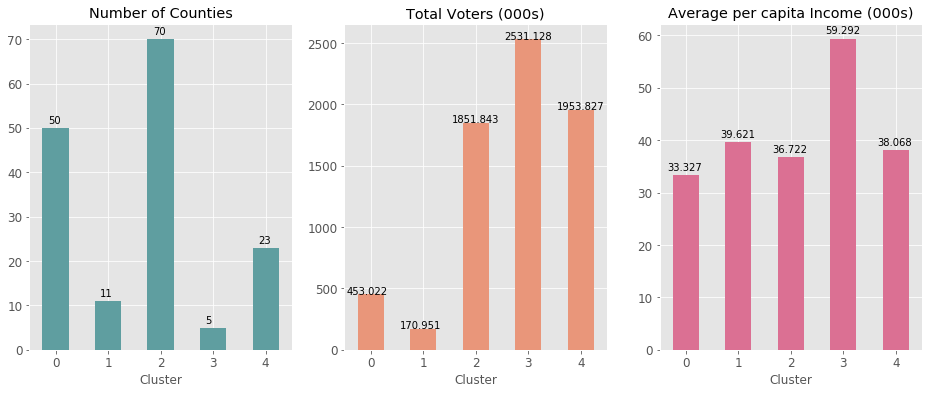

In [78]:
#plot these stats and income next to each other using 'subplot' (not taught
#in the course, but quite handy and easy to learn from matplotlib doc)

fig, ax=plt.subplots(ncols=3, figsize=(16,6))

#plot a bar chart for each cluster's stat result
ax1=df_cluster_stats['Cluster'].plot(kind='bar', 
    title='Number of Counties',
    fontsize=12, rot=0, color='cadetblue', ax=ax[0])
#add totals at top of bar for better visualisation
for i in ax1.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax1.annotate('{:}'.format(height), (x + 0.1, y + height + 1.0), fontsize=10, 
                 color='black')
    
#...and plot the voter totals
ax2=df_cluster_stats['Total Voters (000s)'].plot(kind='bar', 
    title='Total Voters (000s)',
    fontsize=12, rot=0, color='darksalmon', ax=ax[1])
#add totals at top of bar for better visualisation
for i in ax2.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax2.annotate('{0:.3f}'.format(height), (x - 0.2, y + height + 1.0), fontsize=10, 
                 color='black')

#...and plot the voter totals
ax3=df_cluster_stats['2018 Per Capita Income (000s)'].plot(kind='bar', 
    title='Average per capita Income (000s)',
    fontsize=12, rot=0, color='palevioletred', ax=ax[2])
#add totals at top of bar for better visualisation
for i in ax3.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax3.annotate('{0:.3f}'.format(height), (x - 0.1, y + height + 1.0), fontsize=10, 
                 color='black')

plt.show()

We can see that the clusters vary in terms of number of counties and voter population size, and are mostly on par regarding average income with one exception.

Cluster 3 stands out as having the largest voter population size whilst having the smallest number of counties. It also stands out as having the highest average per-capita income at 59.3k, with the other clusters roughly on par with one another (between 33.3k to 38.1k average pe capita income).

Cluster 1 also stands out as having the smallest voter population size and second smallest number of constituent counties.

In [79]:
#prep for remaining cluster bar charts.  Set colours and  
#get rid of the large value voting population (skews bar charts) and
#superfluous cluster col (cluster is the index for the plot df)
kcols.remove("Voting Pop (000s)")
kcols.remove("2018 Per Capita Income (000s)")
kcols.remove("Cluster")


In [80]:
#now get averages for each cluster...

df_cluster_stats = pd.DataFrame(data=None)

for i in range(0, kclusters):
    temp=[]
    temp=df_counties_merged[kcols].loc[
                df_counties_merged['Cluster']==i].groupby(
                        df_counties_merged['Cluster']).mean()
    df_cluster_stats=df_cluster_stats.append([temp])


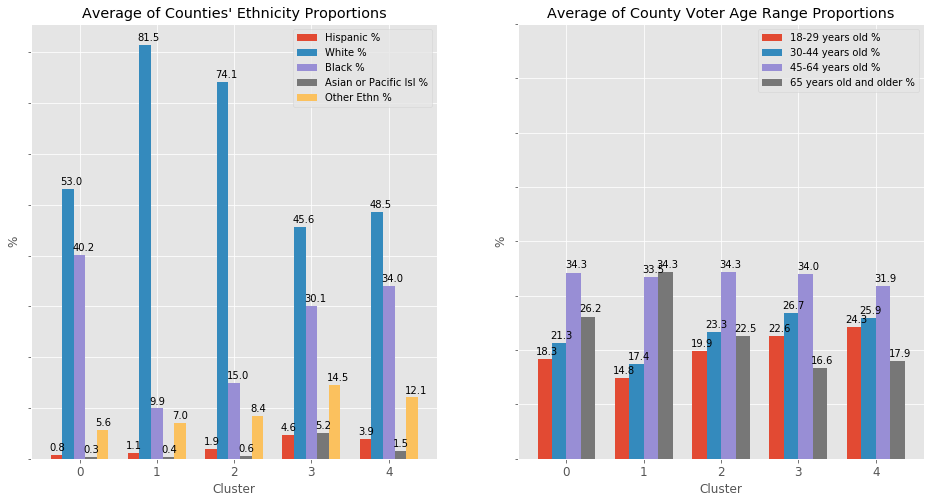

In [81]:
#...and now plot the averages; plot a bar chart for each cluster's stat result
fig, ax=plt.subplots(ncols=2, figsize=(16,8))

#plot a bar chart for each cluster's stat result
ax1=df_cluster_stats[['Hispanic %', 'White %', 'Black %', 
       'Asian or Pacific Isl %', 'Other Ethn %']].plot(kind='bar', 
    title="Average of Counties' Ethnicity Proportions",
    fontsize=12, rot=0, ax=ax[0], width=0.75)
#add totals at top of bar for better visualisation
for i in ax1.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax1.annotate('{:.1f}'.format(height), (x - 0.02, y + height + 0.8), fontsize=10, 
                 color='black')
ytcks=np.arange(0,85,10)
ax1.set_yticklabels("")
ax1.set_ylabel("%")
ax1.set_yticks(ytcks)
    
cols2=['18-29 years old %', '30-44 years old %', '45-64 years old %', 
       '65 years old and older %']
ax2=df_cluster_stats[cols2].plot(kind='bar', 
    title="Average of County Voter Age Range Proportions",
    fontsize=12, rot=0, ax=ax[1], width=0.75)
#add totals at top of bar for better visualisation
for i in ax2.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax2.annotate('{:.1f}'.format(height), (x - 0.02, y + height + 0.8), fontsize=10, 
                 color='black')    
ytcks2=np.arange(0,85,10)
ax2.set_yticklabels("")
ax2.set_ylabel("%")
ax2.set_yticks(ytcks2)

#plt.figure(figsize=(16,12))

plt.show()

For ethnicity and age demographics, we can see Clusters 1 and 2 have the highest proportion of white ethnicity amongst voters (81.5% and 74.1%, respectively), with Cluster 1 also having the largest percentage of older (65 years and above) voters (34.3%). 

Cluster 3 appears most mixed both in terms of ethnicity and age ranges, followed by Cluster 4 with a more evenly distributed age range than Cluster 3; both clusters have a lower proportion of older voters as compared to other clusters.


***********************************************************************

Now let's see what the clusters look like on the map relative to the position of the Districts (as indicated by a District map courtesy of the National Atlas, as I was unable to source a usable Georgia congressional district map).  Will also show the district office locations used in venue analysis earlier, coloured with district party (Red = Republican, Blue = Democratic).

In [85]:
#Let's see where (approximately) our new clusters are located.
#We need the coordinates for the state of Georgia and a map of
#Georgia counties to help with later illustration.
georgia = geocoder.osm('Georgia, USA')
georgia_county_data = \
  '/Users/jtege/Documents/Coursera IBM Data Sci Spec/9. Applied Data Science Capstone/Coursera_Capstone/cb_2018_13_sldu_500k.geojson'


georgia_map=folium.Map(location=(georgia.latlng), 
                       zoom_start=6.5)
georgia_map.choropleth(geo_data = georgia_county_data,
                            key_on='feature.properties.name',
                            fill_color='YlOrRd', 
                            fill_opacity=0.05, 
                            line_opacity=0.03)

#...and then set colours for clusters (use cluster number to index 
#into colours list) and plot the counties
cluster_colours=['blue', 'green', 
           'red', 'cyan', 'magenta']

df_clusterc=pd.DataFrame(data=None, columns=['cluster', 'colour'])
df_clusterc['cluster'] = df_counties_merged['Cluster'].unique()
df_clusterc['colour'] = cluster_colours
df_clusterc = df_clusterc.sort_values(by='cluster', ascending=True)


for lat, lng, county, cluster in zip(df_counties_merged['Latitude'], 
                           df_counties_merged['Longitude'], 
                           df_counties_merged['County'],
                            df_counties_merged['Cluster']):
    
    clcolour = df_clusterc['colour'].loc[(df_clusterc['cluster']== \
                                       cluster)].tolist()

    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        weight=1,
        color='yellow',
        fill=True,
        popup=county,
        fill_color=clcolour,
        fill_opacity=0.6
    ).add_to(georgia_map)

#Now overlay the Georgia congressional district map onto our map.  Note
#this isnt something they taught in the course, but as I struggled to
#find a usable district kml or geojson file, I resorted to overlays
pic= \
  "/Users/jtege/Documents/Coursera IBM Data Sci Spec/9. Applied Data Science Capstone/Coursera_Capstone/Georgia_Congressional_Distr.png"

folium.plugins.ImageOverlay(
        name="georgia districts",
        image=pic,
        bounds=[[35.100000, -85.700000], [30.250000, -80.700000]],
        opacity=1.0,
        zindex=1).add_to(georgia_map)

#[35.100000, -85.700000], [30.250000, -80.700000] has ok upper
#placements but slightly too wide on the left and right.  But getting
#exact alignment would require alot more research than time 
#allowed.

#Now map the congressional district offices with party colour as popups
#(these were the addresses used in the FourSquare venues analysis).
for lat, lon, poi, pcolor in zip(df_districts_merged['Latitude'], 
                        df_districts_merged['Longitude'], 
                        df_districts_merged['District - Party'],
                        df_districts_merged['party_color']): 

    label = folium.Popup(poi, 
                         max_width=50,
                         parse_html=True)    
#Folium/leaflet popup color pallette is more limited than matplotlib so
#need to change so district party colour is visible in map
    if pcolor=='indianred':
        colour='red'
    else:
        colour='blue'

    folium.Marker(
        [lat, lon],
        popup=label,
        icon=folium.Icon(icon='info-sign', color=colour)
        ).add_to(georgia_map)

fig = Figure(width=500, height=600)
fig.add_child(georgia_map)

georgia_map

In [84]:
#as there is no easy way to visualise a legend in Folium, will create
#a quick df with the colours used

df_clusterc.style.hide_index()

cluster,colour
0,green
1,magenta
2,blue
3,cyan
4,red


Note that 'Blue' popups represent Democratic electorate offices, and 'Red' popups represent Republican electoral offices.  Cluster markers legend is reflected in the short df above.  District colours were set in the .png file used to overlay the Georgia map and appear to be random.

Given the redistricting requirement of equal approximate population size, it is unsurprising to see a cluster of district offices around the Atlanta region (an area of approximately 469,000 people in 2015, the year of the last redistricting). (source: wikipedia)

Counties of the same clusters are, for the most part, geographically dispersed, however these clusters may still suggest a prioritisation or campaign alignment strategy that extends beyond normal 'district-centric' targetting.  Given the presumed gerrymandering applied to the last redistricting in Georgia, this may be important to state-wide election campaigns.


***********************************************************************

<h3 align=left><font size = 3>Step 4 - Results Discussion:</font></h3>

***Below consolidates the various observations on districts and counties that may be of most interest to campaign advisors and consultants.***

To be written into report

***********************************************************************

<h3 align=left><font size = 3>Step 5 - Conclusions:</font></h3>

***Below provides conclusions related to the central question "What can be done to counter the effects of gerrymandering?"***

To be written into report